In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sn

matplotlib.rcParams.update({'font.size': 12})
colors = [matplotlib.colors.to_rgb(c) for c in matplotlib.pyplot.rcParams['axes.prop_cycle'].by_key()['color']]
print(colors[0][0])


0.12156862745098039


In [2]:
# # df_no_conf = pd.read_csv("no_confPCR_Pisol100_LFDcomp70.csv")
# df_no_conf_LFD2 = pd.read_csv("no_confPCR_Pisol100_LFDcomp70_LFD2.csv")

In [3]:
# fig, ax = plt.subplots(1,2,figsize=(12,4))
# Scenarios = np.sort(np.unique(df_no_conf["Scenario"]))
# Scenarios_alt_names = np.array(["No testing", "Status Quo", "14-day conc. PCR", \
#                        "14-day rand. PCR", "3 LFDs", "2 LFDs"])
# Mean_RPIs = np.zeros(len(Scenarios))
# for (i,s) in enumerate(Scenarios):
#     Mean_RPIs[i] = np.mean(df_no_conf.loc[df_no_conf["Scenario"]==s,"InfPot"])
# iorder = np.array([0,1,4,3,2,5])

# sn.boxplot(x="Scenario",y="InfPot",order=Scenarios[iorder], \
#               data=df_no_conf, ax=ax[0], fliersize=0, color ='C1', zorder=1)
# sn.violinplot(x="Scenario",y="InfPot",order=Scenarios[iorder], \
#               data=df_no_conf, ax=ax[0], color='C0', zorder=5)
# sn.boxplot(x="Scenario",y="InfPot",order=Scenarios[iorder], \
#               data=df_no_conf_LFD2, ax=ax[1], fliersize=0, color ='C1', zorder=1)
# sn.violinplot(x="Scenario",y="InfPot",order=Scenarios[iorder], \
#               data=df_no_conf_LFD2, ax=ax[1], color='C0', zorder=5)

# for i in [0,1]:
#     ax[i].scatter(Scenarios_alt_names[iorder],Mean_RPIs[iorder],s=50,c='C3',zorder=10)
#     ax[i].set_xticklabels(labels=Scenarios_alt_names[iorder],rotation=90)
#     ax[i].set_ylim(0,8)
#     ax[i].set_ylabel("Infectious Days")

In [14]:
df_conf = pd.read_csv("confPCR_Pisol100_LFDcomp70.csv")
df_conf_LFD2 = pd.read_csv("confPCR_Pisol100_LFDcomp70_LFD2.csv")

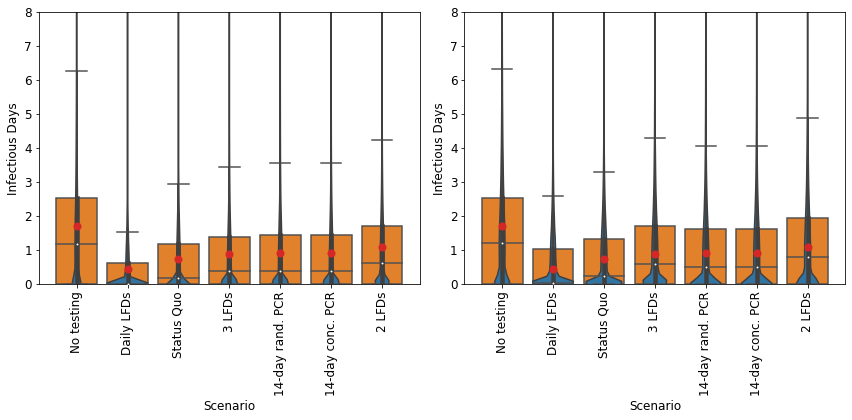

In [15]:
fig, ax = plt.subplots(1,2,figsize=(12,6))
Scenarios = np.sort(np.unique(df_conf["Scenario"]))
Scenarios_alt_names = np.array(["No testing", "Status Quo", "14-day conc. PCR", \
                       "14-day rand. PCR", "3 LFDs", "2 LFDs", "Daily LFDs"])
Mean_RPIs = np.zeros(len(Scenarios))
for (i,s) in enumerate(Scenarios):
    Mean_RPIs[i] = np.mean(df_conf.loc[df_conf["Scenario"]==s,"InfPot"])
iorder = np.array([0,6,1,4,3,2,5])

sn.boxplot(x="Scenario",y="InfPot",order=Scenarios[iorder], \
              data=df_conf, ax=ax[0], fliersize=0, color ='C1', zorder=1)
sn.violinplot(x="Scenario",y="InfPot",order=Scenarios[iorder], \
              data=df_conf, ax=ax[0], color='C0', zorder=5)
sn.boxplot(x="Scenario",y="InfPot",order=Scenarios[iorder], \
              data=df_conf_LFD2, ax=ax[1], fliersize=0, color ='C1', zorder=1)
sn.violinplot(x="Scenario",y="InfPot",order=Scenarios[iorder], \
              data=df_conf_LFD2, ax=ax[1], color='C0', zorder=5)

for i in [0,1]:
    ax[i].scatter(Scenarios_alt_names[iorder],Mean_RPIs[iorder],s=50,c='C3',zorder=10)
    ax[i].set_xticklabels(labels=Scenarios_alt_names[iorder],rotation=90)
    ax[i].set_ylim(0,8)
    ax[i].set_ylabel("Infectious Days")
fig.tight_layout()
fig.savefig("stoch_with_conf.png")

In [16]:
df_conf_lowcomp = pd.read_csv("confPCR_Pisol100_LFDcomp40.csv")
df_conf_LFD2_lowcomp = pd.read_csv("confPCR_Pisol100_LFDcomp40_LFD2.csv")

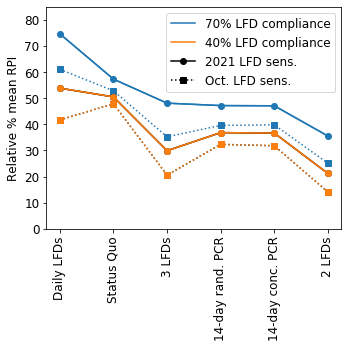

In [17]:
fig, ax = plt.subplots(1,1,figsize=(5,5))
mean_RPI1 = np.zeros(len(Scenarios))
for i in np.arange(len(Scenarios)):
    mean_RPI1[i] = np.mean(df_conf.loc[df_conf["Scenario"]==Scenarios[i],"InfPot"])
ax.plot(Scenarios_alt_names[iorder[1:]],100*(1 - mean_RPI1[iorder[1:]]/mean_RPI1[iorder[0]]),\
        '-',c='C0',label='70% LFD compliance')
ax.plot(Scenarios_alt_names[iorder[1:]],100*(1 - mean_RPI1[iorder[1:]]/mean_RPI1[iorder[0]]),\
        '-o',c='C0')
mean_RPI2 = np.zeros(len(Scenarios))
for i in np.arange(len(Scenarios)):
    mean_RPI2[i] = np.mean(df_conf_LFD2.loc[df_conf_LFD2["Scenario"]==Scenarios[i],"InfPot"])
ax.plot(Scenarios_alt_names[iorder[1:]],100*(1 - mean_RPI2[iorder[1:]]/mean_RPI2[iorder[0]]),\
        ':s',c='C0')
mean_RPI3 = np.zeros(len(Scenarios))
for i in np.arange(len(Scenarios)):
    mean_RPI3[i] = np.mean(df_conf_lowcomp.loc[df_conf_lowcomp["Scenario"]==Scenarios[i],"InfPot"])
ax.plot(Scenarios_alt_names[iorder[1:]],100*(1 - mean_RPI3[iorder[1:]]/mean_RPI3[iorder[0]]),\
        '-',c='C1',label="40% LFD compliance")
ax.plot(Scenarios_alt_names[iorder[1:]],100*(1 - mean_RPI3[iorder[1:]]/mean_RPI3[iorder[0]]),\
        '-o',c='k',label="2021 LFD sens.")
ax.plot(Scenarios_alt_names[iorder[1:]],100*(1 - mean_RPI3[iorder[1:]]/mean_RPI3[iorder[0]]),\
        '-o',c='C1')
mean_RPI4 = np.zeros(len(Scenarios))
for i in np.arange(len(Scenarios)):
    mean_RPI4[i] = np.mean(df_conf_LFD2_lowcomp.loc[df_conf_LFD2_lowcomp["Scenario"]==Scenarios[i],"InfPot"])

ax.plot(Scenarios_alt_names[iorder[1:]],100*(1 - mean_RPI4[iorder[1:]]/mean_RPI4[iorder[0]]),\
        ':s',c='k',label="Oct. LFD sens.")    
ax.plot(Scenarios_alt_names[iorder[1:]],100*(1 - mean_RPI4[iorder[1:]]/mean_RPI4[iorder[0]]),\
        ':s',c='C1')
ax.set_ylim(0,85)
ax.set_ylabel("Relative % mean RPI")
ax.set_xticklabels(labels=Scenarios_alt_names[iorder[1:]],rotation=90)
ax.legend()
fig.tight_layout()
fig.savefig("scenario_stoch.png")

In [50]:
df_conf["Params"] = np.ones(len(df_conf),dtype=np.object)*"70% LFD compliance"
df_conf_lowcomp["Params"] = np.ones(len(df_conf_lowcomp),dtype=np.object)*"40% LFD compliance"
df_conc = pd.concat([df_conf, df_conf_lowcomp])

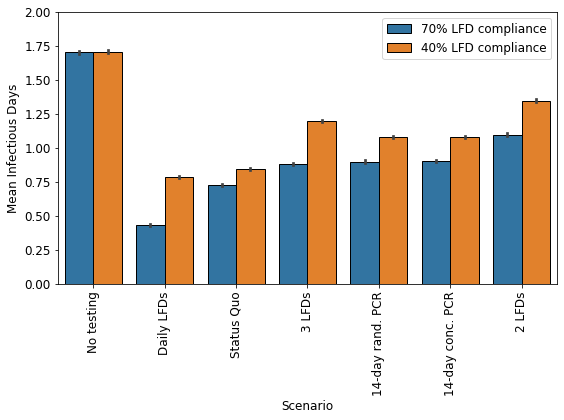

In [52]:
colours = ['C0','C1',]
customPalette = sn.set_palette(sn.color_palette(colours))
fig,ax = plt.subplots(1,1,figsize=(8,6))
lm = sn.barplot(x="Scenario",y="InfPot",hue="Params",order=Scenarios[iorder],data=df_conc, 
                palette = customPalette, edgecolor='k', ax=ax)
ax.set_xticklabels(labels=Scenarios_alt_names[iorder],rotation=90)
ax.set_ylim(0,2.0)
ax.set_ylabel("Mean Infectious Days")

# # Loop over the bars
# for i,thisbar in enumerate(lm.patches):
#     # Set a different hatch for each bar
#     if i >= 21:
#         thisbar.set_hatch('\\')
#     else:
#         if i >= 14:
#             thisbar.set_hatch('+')

ax.legend(title="")
fig.tight_layout()
fig.savefig("Model2_comp.png")

Calculate mean effects

In [24]:
Mean_RPIs = np.zeros(len(Scenarios))
Mean_RPIs_lowcomp = np.zeros(len(Scenarios))
Mean_RPIs_LFD2 = np.zeros(len(Scenarios))
for (i,s) in enumerate(Scenarios):
    Mean_RPIs[i] = np.mean(df_conf.loc[df_conf["Scenario"]==s,"InfPot"])
    Mean_RPIs_lowcomp[i] = np.mean(df_conf_lowcomp.loc[df_conf_lowcomp["Scenario"]==s,"InfPot"])
    Mean_RPIs_LFD2[i] = np.mean(df_conf_LFD2.loc[df_conf["Scenario"]==s,"InfPot"])
Rel_mean_RPIs = (1 - Mean_RPIs/Mean_RPIs[0])/(1 - Mean_RPIs[1]/Mean_RPIs[0])
Rel_mean_RPIs_lowcomp = (1 - Mean_RPIs_lowcomp/Mean_RPIs_lowcomp[0])/\
                        (1 - Mean_RPIs_lowcomp[1]/Mean_RPIs_lowcomp[0])
Rel_mean_RPIs_LFD2 = (1 - Mean_RPIs_LFD2/Mean_RPIs_LFD2[0])/\
                     (1 - Mean_RPIs_LFD2[1]/Mean_RPIs_LFD2[0])

In [25]:
print(Scenarios)
print(Rel_mean_RPIs)
print(Rel_mean_RPIs_lowcomp)
print(Rel_mean_RPIs_LFD2)

['(a) No testing' '(b) Status Quo' '(c1) Fortnightly concurrent PCR'
 '(c2) Fortnightly random PCR' '(d) 3 LFDs per week' '(e) 2 LFDs per week']
[0.         1.         0.82301891 0.82867737 0.84553009 0.64154103]
[0.         1.         0.72186734 0.72473591 0.6027255  0.42763032]
[0.         1.         0.76338532 0.76909464 0.68820244 0.5019794 ]


[1.70246899 0.71978601 0.89370232 0.88814185 0.87158096 1.07203754]


In [19]:
print(len(df_conf))

700000
